# The Oscars

Dalton Hahn (2762306)

## Shakespearean Play Data

https://www.kaggle.com/kingburrito666/shakespeare-plays/download

## Data Visualization and Storytelling

### "What is the proportion of 'airtime' that Shakespeare grants to his main characters vs. his auxiliary characters"

In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev

In [8]:
df = pd.read_csv("../data/processed/roles.csv")

In [9]:
df.head()

,Unnamed: 0,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Year,Main
0,0,18569,ANTONY AND CLEOPATRA,1.0,1.1.1,PHILO,"Nay, but this dotage of our general's",1607,0
1,1,18570,ANTONY AND CLEOPATRA,1.0,1.1.2,PHILO,"O'erflows the measure: those his goodly eyes,",1607,0
2,2,18571,ANTONY AND CLEOPATRA,1.0,1.1.3,PHILO,That o'er the files and musters of the war,1607,0
3,3,18572,ANTONY AND CLEOPATRA,1.0,1.1.4,PHILO,"Have glow'd like plated Mars, now bend, now turn,",1607,0
4,4,18573,ANTONY AND CLEOPATRA,1.0,1.1.5,PHILO,The office and devotion of their view,1607,0


### Important Notes
* Main column (0 = Secondary Character, 1 = Main Character)

In [10]:
unique_plays = df["Play"].unique()
print(unique_plays)

['ANTONY AND CLEOPATRA' 'CORIOLANUS' 'HAMLET' 'JULIUS CAESAR' 'KING LEAR'
 'MACBETH' 'OTHELLO' 'ROMEO AND JULIET' 'TIMON OF ATHENS'
 'TROILUS AND CRESSIDA']


In [13]:
# NOTE, in my role_word_counts dictionary, the tuple of counts will be (Secondary, Main)

role_word_counts = dict.fromkeys(unique_plays, (0,0))

for index,row in df.iterrows():
    if row["Main"] == 0:
        role_tuple = role_word_counts.get(row["Play"])
        new_sec_val = role_tuple[0] + len(row["PlayerLine"].split())
        fin_tuple = (new_sec_val, role_tuple[1])
    else:
        role_tuple = role_word_counts.get(row["Play"])
        new_main_val = role_tuple[1] + len(row["PlayerLine"].split())
        fin_tuple = (role_tuple[0], new_main_val)
    
    role_word_counts[row["Play"]] = fin_tuple

In [14]:
print(role_word_counts)

{'ANTONY AND CLEOPATRA': (17835, 5936), 'CORIOLANUS': (21843, 4811), 'HAMLET': (18009, 11600), 'JULIUS CAESAR': (13706, 5413), 'KING LEAR': (19703, 5579), 'MACBETH': (16489, 0), 'OTHELLO': (19608, 6227), 'ROMEO AND JULIET': (19238, 4669), 'TIMON OF ATHENS': (11880, 6009), 'TROILUS AND CRESSIDA': (21557, 3949)}


In [15]:
# INSPIRATION: https://python-graph-gallery.com/11-grouped-barplot/

# set width of bar
barWidth = 0.4
 
# set height of bar
secondary_bars = []
main_bars = []

for key,val in role_word_counts.items():
    secondary_bars.append(val[0])
    main_bars.append(val[1])
    
print(secondary_bars)
print(main_bars)

[17835, 21843, 18009, 13706, 19703, 16489, 19608, 19238, 11880, 21557]
[5936, 4811, 11600, 5413, 5579, 0, 6227, 4669, 6009, 3949]


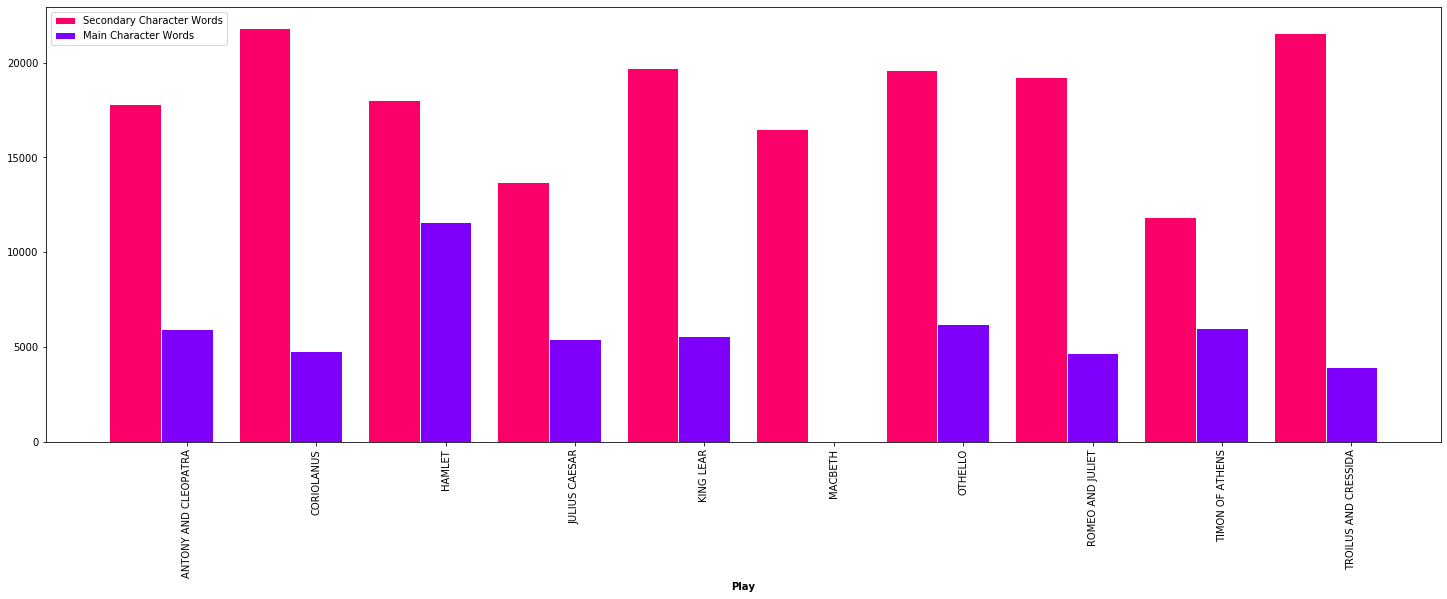

In [17]:
 
# Set position of bar on X axis
r1 = np.arange(len(secondary_bars))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.figure(figsize=(25,8))
plt.bar(r1, secondary_bars, color='#fc0069', width=barWidth, edgecolor='white', label='Secondary Character Words')
plt.bar(r2, main_bars, color='#7e00fc', width=barWidth, edgecolor='white', label='Main Character Words')
 
# Add xticks on the middle of the group bars
plt.xlabel('Play', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(secondary_bars))], list(role_word_counts.keys()), rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show()

# Conclusion

**Caveat**: Primary vs. Secondary information from external source and not for all plays

I think this bar chart turned out pretty good even though there was quite a bit of missing data and the data came from an external source that I kind of just eyeballed.  I also think that if given more time, rather than simply comparing word counts, a ratio of 